In [1]:
import numpy as np 
import pandas as pd 
from scipy.optimize import root

from SimSale import SimSale
from Demand import Demand
from numba import jit

## 1.模拟数据 及 待估计参数

In [4]:
sim_sale=SimSale(level_size=[3,3],seed=1)
sale_df = sim_sale.generate_sale(lam=1000,size=1000,un_ava_frac=0.3,un_ava_mix=True)
# sale_df
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1])
mod = Demand(data=sale_df, goods_attr={'A': ['a', 'b','c'], 'B': ['a', 'b','c']})
sale_df

a    0.318605
b    0.591657
c    0.089738
Name: A, dtype: float64
a    0.231984
b    0.554702
c    0.213314
Name: B, dtype: float64
          a         b         c
a  1.000000  0.308713  0.419093
b  0.819426  1.000000  0.544098
c  0.027284  0.745978  1.000000
          a         b         c
a  1.000000  0.132701  0.399082
b  0.201421  1.000000  0.742861
c  0.277605  0.480339  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,188.0,224.0,NaN,NaN,347.0,123.0,24.0,NaN,24.0
0,65.0,199.0,NaN,161.0,310.0,147.0,NaN,40.0,NaN
0,NaN,NaN,215.0,NaN,298.0,116.0,121.0,53.0,15.0
0,74.0,198.0,NaN,145.0,371.0,NaN,20.0,67.0,NaN
0,NaN,NaN,194.0,149.0,335.0,139.0,53.0,53.0,NaN
...,...,...,...,...,...,...,...,...,...
0,NaN,191.0,81.0,NaN,392.0,133.0,121.0,NaN,17.0
0,184.0,182.0,50.0,NaN,339.0,143.0,NaN,49.0,NaN
0,193.0,439.0,75.0,NaN,NaN,151.0,19.0,NaN,51.0
0,169.0,NaN,200.0,NaN,313.0,121.0,NaN,49.0,32.0


## 2.参数估计

     fun: 1345881.782541547
 message: ['Maximum number of iteration reached']
    nfev: 52208
    nhev: 0
     nit: 1000
    njev: 853
  status: 0
 success: True
       x: array([ 0.32595946,  0.94134232, -0.94742418, -0.24019663,  0.63565338,
       -0.31964037, -0.97403461, -0.34781843,  0.14326452,  1.44515139,
       -2.50414557,  0.95797762, -2.34464915, -0.39077484,  0.95797606,
       -1.9727785 , -1.6748421 , -0.18131405])


([array([0.31946352, 0.59112408, 0.08941241]),
  array([0.23123819, 0.55518329, 0.21357852])],
 [array([0.27407705, 0.41391155, 0.53575499, 0.80925111, 0.07556807,
         0.72271671]),
  array([0.08749203, 0.40353079, 0.7227164 , 0.12209076, 0.15777967,
         0.45479526])])

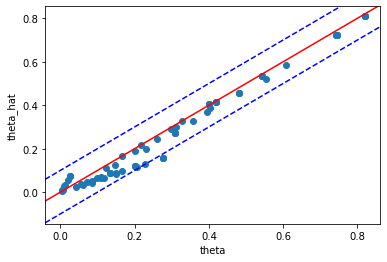

In [5]:
# method='dual_annealing'
mod.fit(method='dual_annealing')
print(mod.theta_hat)
mod.validation(sim_sale,interval=0.1)
mod.init_theta(mod.theta_hat.x,to_goods=False)

In [23]:
mod.attr_trans

[      A_a   A_b   A_c
 A_a   NaN  68.0  68.0
 A_b  51.0   NaN  51.0
 A_c  59.0  59.0   NaN,
       B_a   B_b
 B_a   NaN  84.0
 B_b  80.0   NaN]

In [4]:
from Demand import loglikelihood
loglikelihood(*mod.init_theta(theta_flatten=range(18)),data_numpy=sale_df.to_numpy())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0.        0.9999833 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]]
[[0.        0.9999833 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]]
[[0.        0.9999833 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0.99999386 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0.99999386 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
[[0.99999386 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         

1480784.4974816716

In [9]:
len(sim_sale.goods_pi.to_numpy().flatten())

81

In [10]:

mod.init_theta(mod.theta_hat.x)[1].flatten()

array([1.        , 0.52100754, 0.50434381, 0.26276693, 0.50339962,
       1.        , 0.25388648, 0.50434381, 0.46595178, 0.24276439,
       1.        , 0.52100754, 0.23455995, 0.46595178, 0.50339962,
       1.        ])

In [13]:
x = np.arange(8).reshape((2,4))
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [14]:
trans_pi_max = np.zeros_like(x)
row_indices = np.arange(x.shape[0])
col_indices = np.argmax(x,axis=1)

for i in row_indices:
    col_index = col_indices[i]
    for j in row_indices:
        if j == col_index:
            trans_pi_max[i,j] = np.max(x[i])
        else :
            pass

In [15]:
trans_pi_max

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

In [11]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])